<a href="https://colab.research.google.com/github/mahmoudta74/Pytorch_Tutorial/blob/master/Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing torch

In [13]:
#import essential packages 
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torchvision.transforms as transforms

In [ ]:
print(torch.__version__)
torch.cuda.is_available()

1.7.0+cu101


True

In [ ]:
!nvidia-smi

Wed Jan 27 17:33:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |     10MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
!pip install gputil;
!pip install psutil;
!pip install humanize;

# Import packages
import os,sys,humanize,psutil,GPUtil

# Define function
def mem_report():
  print("CPU RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ))
  
  GPUs = GPUtil.getGPUs()
  for i, gpu in enumerate(GPUs):
    print('GPU {:d} ... Mem Free: {:.0f}MB / {:.0f}MB | Utilization {:3.0f}%'.format(i, gpu.memoryFree, gpu.memoryTotal, gpu.memoryUtil*100))
    
# Execute function
mem_report()

CPU RAM Free: 12.7 GB
GPU 0 ... Mem Free: 15069MB / 15079MB | Utilization   0%


# Tensors

In [ ]:
#create tensor
tensor0d = torch.tensor(5)
tensor1d = torch.tensor([1,2,7])
tensor2d = torch.tensor([[1,2], [4,7]])
#...
print(tensor0d, '\n', tensor1d, '\n', tensor2d, '\n\n\n')

print(tensor2d.shape,'\n',tensor2d.size(), '\n\n\n')    # .size() need () but .shape dose'nt need  
print(tensor2d[0],'\n', tensor2d.shape[0],'\n', tensor2d.size(0), '\n\n\n')



print(tensor2d.dtype)
tensor2d = tensor2d.type(dtype= torch.int32)
print(tensor2d.dtype)
#cpu tensor
tensor2d = tensor2d.type(dtype= torch.FloatTensor)
print(tensor2d.dtype)

#gpu tensor
tensor2d = tensor2d.type(dtype= torch.cuda.FloatTensor)
print(tensor2d.dtype)


#reshap tensor
t1 = torch.tensor([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print('\n\nt1=',t1)

t2 = t1.reshape((3,4))
print('\nt2=',t2)

t3 = t1.reshape((2,6))
print('\nt3=',t3)

tensor(5) 
 tensor([1, 2, 7]) 
 tensor([[1, 2],
        [4, 7]]) 



torch.Size([2, 2]) 
 torch.Size([2, 2]) 



tensor([1, 2]) 
 2 
 2 



torch.int64
torch.int32
torch.float32
torch.float32


t1= tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])

t2= tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

t3= tensor([[ 1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11, 12]])


In [ ]:
# special tensors
zeros2d = torch.zeros(2, 2, dtype=torch.float16)
print(zeros2d,'\n')

ones2d = torch.ones(4, 8)
print(ones2d,'\n')

full2d = torch.full((3,4), 4, dtype=torch.int8)
print(full2d,'\n')

eye_tensor = torch.eye(5)
print(eye_tensor,'\n')

arange_tensor = torch.arange(0, 10, 2)
(arange_tensor,'\n')

linspace_tensor = torch.linspace(0, 1, 15)
print(linspace_tensor,'\n')

logspace_tensor = torch.logspace(0, 2, 10)
print(logspace_tensor,'\n')

empty_tensor = torch.empty((2,3), dtype= torch.int8)
print(empty_tensor)

tensor([[0., 0.],
        [0., 0.]], dtype=torch.float16) 

tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]]) 

tensor([[4, 4, 4, 4],
        [4, 4, 4, 4],
        [4, 4, 4, 4]], dtype=torch.int8) 

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]]) 

tensor([0.0000, 0.0714, 0.1429, 0.2143, 0.2857, 0.3571, 0.4286, 0.5000, 0.5714,
        0.6429, 0.7143, 0.7857, 0.8571, 0.9286, 1.0000]) 

tensor([  1.0000,   1.6681,   2.7826,   4.6416,   7.7426,  12.9155,  21.5443,
         35.9381,  59.9484, 100.0000]) 

tensor([[-64, 104,  18],
        [-75,   0,   0]], dtype=torch.int8)


In [24]:
#Tensor Attributes
tensor = torch.rand((3,4), device='cpu')

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

tensor = torch.rand(3,4, device='cuda:0')
print(f"\nDevice tensor is stored on: {tensor.device}")



#>>> torch.device('cuda:0')
#device(type='cuda', index=0)

#>>> torch.device('cpu')
#device(type='cpu')

#>>> torch.device('cuda')  # current cuda device
#device(type='cuda')

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu

Device tensor is stored on: cuda:0


In [32]:
#Joining tensors. You can use torch.cat to concatenate
#a sequence of tensors along a given dimension.
#See also torch.stack, another tensor joining op that is subtly different from torch.cat.

tensor = torch.ones(3, 3)
tensor[:,1] = 0
print(tensor,'\n\n')

t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1,)

tensor([[1., 0., 1.],
        [1., 0., 1.],
        [1., 0., 1.]]) 


tensor([[1., 0., 1., 1., 0., 1., 1., 0., 1.],
        [1., 0., 1., 1., 0., 1., 1., 0., 1.],
        [1., 0., 1., 1., 0., 1., 1., 0., 1.]])


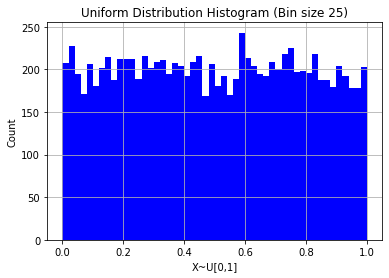

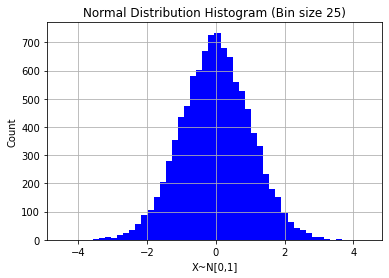

tensor([[2, 1, 0],
        [5, 9, 0],
        [6, 7, 5],
        [8, 6, 3]]) 

tensor([3, 6, 5, 7, 2, 1, 4, 0]) 

tensor([3, 6, 5, 7, 2, 1, 4, 0]) 

tensor([3, 6, 5, 7, 2, 1, 4, 0]) 



In [ ]:
#uniform[0,1] random tensor

rand1d = torch.rand(10000) 
plt.hist(rand1d, 50, color='b') 
plt.xlabel('X~U[0,1]') 
plt.ylabel('Count') 
plt.title("Uniform Distribution Histogram (Bin size 25)") 
plt.grid(True)
plt.show()

#N~(0,1) random tensor

rand1d = torch.randn(10000) 
plt.hist(rand1d, 50, color='b') 
plt.xlabel('X~N[0,1]') 
plt.ylabel('Count') 
plt.title("Normal Distribution Histogram (Bin size 25)") 
plt.grid(True)
plt.show()


randint2d = torch.randint(10, (4,3))   #4*3 _ 0 to 9 random 
print(randint2d,'\n')

# modify seed

for i in range(3):
  torch.manual_seed(8) 
  randp = torch.randperm(8) 
  print(randp,'\n')

In [ ]:
#torch.add(), torch.matmul(), torch.mv(), torch.bmm() ,torch.mm()   matrix mul

#torch.mul()  element to element mul 

# Gradient

In [ ]:
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)
a = torch.tensor(1.)

# Build a computational graph.
y1 = w * x + b    # y1 = 2 * x + 3
y2 = a * x

# Compute gradients.
y1.backward()

# Print out the gradients.
print(x.grad)    # x.grad = 2 
print(w.grad)    # w.grad = 1 
print(b.grad)    # b.grad = 1 
######################################
y2.backward() 
print('\n', x.grad)
print(a.grad)

tensor(2.)
tensor(1.)
tensor(1.)

 tensor(3.)
None


In [ ]:
#Create tensors of shape (10, 3) and (10, 2).
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3,2)
print ('w: ', linear.weight)
print ('b: ', linear.bias,'\n\n')

# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item(),'\n')

# Backward pass.
loss.backward()

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad) 
print ('dL/db: ', linear.bias.grad)

# 1-step gradient descent.
optimizer.step()

# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item(),'\n')

w:  Parameter containing:
tensor([[ 0.3871, -0.2492,  0.5325],
        [-0.4842,  0.4659, -0.0059]], requires_grad=True)
b:  Parameter containing:
tensor([0.4408, 0.5330], requires_grad=True) 


loss:  1.4851362705230713 

dL/dw:  tensor([[ 0.1900, -0.0905,  0.7507],
        [-1.1137,  0.3511, -0.0391]])
dL/db:  tensor([0.0986, 1.0225])
loss after 1 step optimization:  1.4550729990005493 



# loading data from numpy

In [ ]:
# Create a numpy array.
x = np.array([[1, 2], [3, 4]])

# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)

# Convert the torch tensor to a numpy array.
z = y.numpy()

print(type(x), type(y), type(z))

<class 'numpy.ndarray'> <class 'torch.Tensor'> <class 'numpy.ndarray'>


# Input pipeline

Files already downloaded and verified
torch.Size([3, 32, 32])
6 



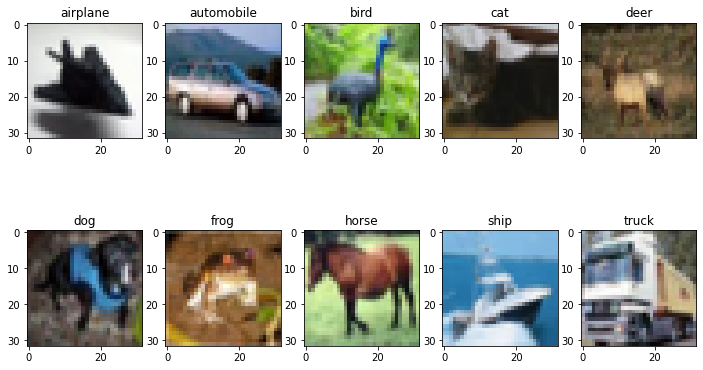

In [ ]:
# Download and construct CIFAR-10 dataset.
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True, 
                                             transform=transforms.ToTensor(),
                                             download=True)

# Fetch one data pair (read data from disk).
image, label = train_dataset[0]
print (image.size())
print (label,'\n')

# 10 clases images
class_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize = (12,7))

for i in range(10):
  plt.subplot(2,5, 1 + i)

  for j in range(100):
    image, label = train_dataset[j]
    
    if label == i :
      to_pil = torchvision.transforms.ToPILImage()
      img = to_pil(image)
      plt.imshow(img)
      plt.title(class_name[i])
      break



# Data loader (this provides queues and threads in a very simple way).
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

# When iteration starts, queue and thread start to load data from files.
data_iter = iter(train_loader)

# Mini-batch images and labels.
images, labels = data_iter.next()

# Actual usage of the data loader is as below.
for images, labels in train_loader:
    # Training code should be written here.
    pass



# Input pipeline for custom dataset



In [ ]:
# You should build your custom dataset as below.
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):
        # TODO
        # 1. Initialize file paths or a list of file names. 
        pass
    def __getitem__(self, index):
        # TODO
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        # 2. Preprocess the data (e.g. torchvision.Transform).
        # 3. Return a data pair (e.g. image and label).
        pass
    def __len__(self):
        # You should change 0 to the total size of your dataset.
        return 0 

# You can then use the prebuilt data loader. 
custom_dataset = CustomDataset()
train_loader = torch.utils.data.DataLoader(dataset=custom_dataset,
                                           batch_size=64, 
                                           shuffle=True)


# pretrained model

In [ ]:
# Download and load the pretrained ResNet-18.
resnet = torchvision.models.resnet18(pretrained=True)

# If you want to finetune only the top layer of the model, set as below.
for param in resnet.parameters():
    param.requires_grad = False

# Replace the top layer for finetuning.
resnet.fc = nn.Linear(resnet.fc.in_features, 100)  # 100 is an example.

# Forward pass.
images = torch.randn(64, 3, 224, 224)
outputs = resnet(images)
print (outputs.size())     # (64, 100)


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth



torch.Size([64, 100])
